# Machine Learning Algorithms - (1) Regularization

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on different tutorials and resources. Parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(42)

## 1. Bias-Variance Trade-off

"Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data. If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data. This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time."

[Understanding the Bias-Variance Tradeoff; Seema Singh (2018)](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- Underfitting: High bias, poor performance on both training and test sets.
- Overfitting: High variance, great on training set but poor generalization.

## 2. What is Regularization?

Regularization is a technique to reduce overfitting in machine learning. Overfitting happens when a model learns noise from the training set.

Regularization adds a penalty to the cost function to discourage complex models (i.e., models with large weights).

Regularization introduces bias to reduce variance — often improving test performance.

## 3. L1 vs L2 Regularization

Suppose we are doing linear regression:
$$ \hat{y}_i = \theta_0 + \theta_1 x_i $$

The usual cost function is:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}_i - y_i)^2 $$

With regularization:
- **L1 (Lasso)**: $ J_{L1} = J + \lambda \sum |\theta_j| $
- **L2 (Ridge)**: $ J_{L2} = J + \lambda \sum \theta_j^2 $

L1 encourages sparsity (many zero weights), L2 encourages small but non-zero weights.


## 4. Synthetic Dataset

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # add bias
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2)

## 5. Implement Ridge (L2) and Lasso (L1) Regression using Gradient Descent

In [5]:
def compute_cost_l2(theta, X, y, lam):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2) + lam * np.sum(theta[1:] ** 2)
    return cost

def gradient_descent_l2(X, y, theta, alpha, n_iter, lam):
    m = len(y)
    cost_history = []
    for _ in range(n_iter):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        gradients[1:] += 2 * lam * theta[1:]  # L2 penalty
        theta -= alpha * gradients
        cost_history.append(compute_cost_l2(theta, X, y, lam))
    return theta, cost_history

def compute_cost_l1(theta, X, y, lam):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2) + lam * np.sum(np.abs(theta[1:]))
    return cost

def gradient_descent_l1(X, y, theta, alpha, n_iter, lam):
    m = len(y)
    cost_history = []
    for _ in range(n_iter):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        gradients[1:] += lam * np.sign(theta[1:])  # L1 penalty
        theta -= alpha * gradients
        cost_history.append(compute_cost_l1(theta, X, y, lam))
    return theta, cost_history

## 6. Train the Models

In [6]:
init_theta = np.random.randn(2, 1)
alpha = 0.1
iterations = 100
lam = 0.1

theta_l2, cost_l2 = gradient_descent_l2(X_train, y_train, init_theta.copy(), alpha, iterations, lam)
theta_l1, cost_l1 = gradient_descent_l1(X_train, y_train, init_theta.copy(), alpha, iterations, lam)

## 7. Visualize Cost over Iterations

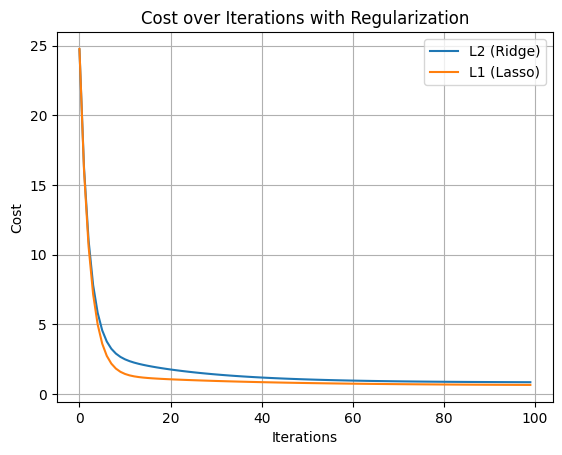

In [7]:
plt.plot(cost_l2, label="L2 (Ridge)")
plt.plot(cost_l1, label="L1 (Lasso)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over Iterations with Regularization")
plt.legend()
plt.grid(True)
plt.show()

## 8. Compare Predictions

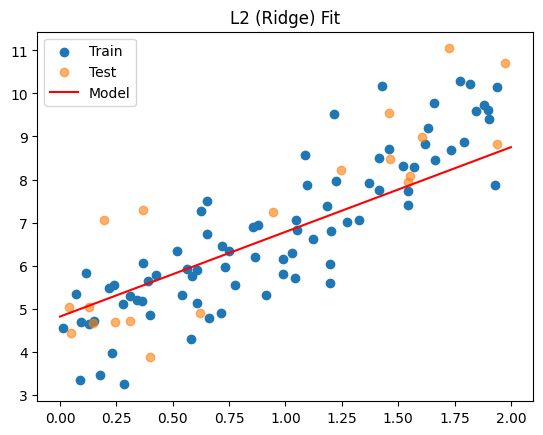

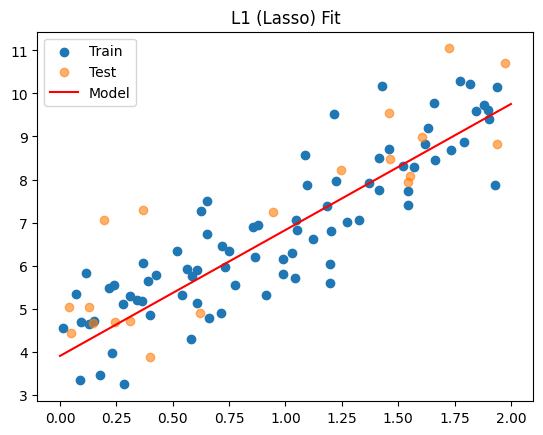

In [8]:
def plot_predictions(theta, title):
    plt.scatter(X_train[:, 1], y_train, label="Train")
    plt.scatter(X_test[:, 1], y_test, label="Test", alpha=0.6)
    x_plot = np.linspace(0, 2, 100)
    y_pred = theta[0] + theta[1] * x_plot
    plt.plot(x_plot, y_pred, 'r-', label="Model")
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(theta_l2, "L2 (Ridge) Fit")
plot_predictions(theta_l1, "L1 (Lasso) Fit")

## 9. Conclusion

- L1 (Lasso) shrinks some weights to exactly zero — useful for feature selection.
- L2 (Ridge) shrinks all weights smoothly but keeps them non-zero — useful when all features are relevant.
- Regularization improves generalization by controlling model complexity.